## This code can be used for post processing of the excel sheet ouput after running HTC simulations using PANDAT GUI and Panpython.

###  Importing the necessary modules

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the excel file (exported from PANDAT). 
##### Deleting the empty rows by using np.arange command when the data is generted using GUI.Be careful and make sure to check the output after deleting the rows. When data is generted using panpython no need to remove the empty rows.

In [2]:
#data = pd.read_excel('table_output.xlsx')
data = pd.read_csv('merged_line.csv')

# Changing the column name from 'T' to 'Temp'
data = data.rename(columns={'T':'Temp'})
# Deleting the first column from the dataframe
data = data.drop(data.columns[0], axis = 1)
data_raw = data.copy()


#Deleting the empty rows using indexes of rows. Double check the rows by printing the data
#data.drop(index = np.arange(0,len(data_raw),2), inplace = True)

data.drop(index = 0, inplace = True) #Removing the first row which has units.
data.reset_index(inplace = True)
data.head()

/tmp/ipykernel_6708/3641804781.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_line.csv')


,index,task_id,Temp,x(Al),x(Co),x(Cr),x(Mn),x(Ti),x(V),w(Al),...,G(@MX2_cF96),f(@B2#1),f(@B2#2),f(@B2),f(@Bcc),f(@Cr3Mn5),f(@Laves_C14),f(@Laves_C15),f(@Liquid),f(@MX2_cF96)
0,1,0.0,0.0,10.0,2.0,23.0,30.0,1.0,34.0,5.38386,...,NaN,0.065575,NaN,NaN,0.550099,0.354414,0.029911,NaN,NaN,NaN
1,2,0.0,20.0,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,NaN,0.065312,NaN,NaN,0.561957,0.342936,0.029794,NaN,NaN,NaN
2,3,0.0,41.25,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,NaN,0.065046,NaN,NaN,0.575470,0.329931,0.029553,NaN,NaN,NaN
3,4,0.0,41.875,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,NaN,0.065039,NaN,NaN,0.575884,0.329534,0.029543,NaN,NaN,NaN
4,5,0.0,41.9529642,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,NaN,0.065038,NaN,NaN,0.575936,0.329485,0.029542,NaN,NaN,NaN


### Making the string of composition from the raw data and appending it to the main dataframe.
#### As of now, this block of code works for Al, Co, Cr, Mn, Ti, and V elements only.

In [3]:
compositions = []
for i in range(0,len(data)):
    comp1, comp2, comp3, comp4, comp5, comp6 = data.loc[i,'x(Al)'], data.loc[i,'x(Co)'], data.loc[i,'x(Cr)'], data.loc[i,'x(Mn)'], data.loc[i,'x(Ti)'], data.loc[i,'x(V)']
    composition = 'Al' + str(comp1) + '-Co' + str(comp2) + '-Cr' + str(comp3) + '-Mn' + str(comp4) + '-Ti' + str(comp5) + '-V' + str(comp6)
    compositions.append(composition)
    
compositions = pd.DataFrame(compositions, columns=['AlloyChemistry'])
data = pd.concat([data, compositions], axis = 1)
data.to_excel('raw_data_with_composition_column.xlsx')
data.head()

,index,task_id,Temp,x(Al),x(Co),x(Cr),x(Mn),x(Ti),x(V),w(Al),...,f(@B2#1),f(@B2#2),f(@B2),f(@Bcc),f(@Cr3Mn5),f(@Laves_C14),f(@Laves_C15),f(@Liquid),f(@MX2_cF96),AlloyChemistry
0,1,0.0,0.0,10.0,2.0,23.0,30.0,1.0,34.0,5.38386,...,0.065575,NaN,NaN,0.550099,0.354414,0.029911,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
1,2,0.0,20.0,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.065312,NaN,NaN,0.561957,0.342936,0.029794,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
2,3,0.0,41.25,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.065046,NaN,NaN,0.575470,0.329931,0.029553,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
3,4,0.0,41.875,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.065039,NaN,NaN,0.575884,0.329534,0.029543,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
4,5,0.0,41.9529642,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.065038,NaN,NaN,0.575936,0.329485,0.029542,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0


### Sorting the data based on uniqueness in terms of AlloyChemistry and Temperature

In [4]:
all_temperatures = data.Temp.unique() #All temperatures
print('Unique temperatures are: ' + str(len(all_temperatures)))

all_compositions = data.AlloyChemistry.unique() # All compositions
print('Unique compositions are: ' + str(len(all_compositions)))

Unique temperatures are: 7298
Unique compositions are: 389


### Selecting the columns for filtering the data.
#### All the columns starting with f(@B) are treated as requited phase columns while other not. Double check the list of required and not required phase columns.

In [5]:
# Select columns that start with "f(@" using startswith() method
all_phases_columns = [col for col in data.columns if col.startswith('f(@')]

# Select columns that start with "f(@B)"
required_phases_columns = [col for col in all_phases_columns if col.startswith('f(@B')]

# Exclude columns that start with "f(@B" using list comprehension
not_required_phases_columns = [col for col in all_phases_columns if not col.startswith('f(@B')]

# Print the selected and filtered column names
print('Required phases are: ' + str(required_phases_columns) + '\n')
print('Not required phases are: ' + str(not_required_phases_columns))

Required phases are: ['f(@B2#1)', 'f(@B2#2)', 'f(@B2)', 'f(@Bcc)']

Not required phases are: ['f(@Cr3Mn5)', 'f(@Laves_C14)', 'f(@Laves_C15)', 'f(@Liquid)', 'f(@MX2_cF96)']


### Downselecting the compositions based on the conditions.
#### This is the block of code where conditions are to be defined for filtering the data/down selecting the compositions.
##### In this version, if the value of the required phase columns is > 0 and values of not required phase columns is null, that composition is selected.

In [6]:
filtered_compositions = data[(data[required_phases_columns] > 0).any(axis = 1) & (data[not_required_phases_columns].isnull().all(axis=1))]

filtered_compositions.to_excel('filtered_data.xlsx')
print('Total filtered compositions are:' + str(len(filtered_compositions)))
filtered_compositions.head(5)

Total filtered compositions are:27853


,index,task_id,Temp,x(Al),x(Co),x(Cr),x(Mn),x(Ti),x(V),w(Al),...,f(@B2#1),f(@B2#2),f(@B2),f(@Bcc),f(@Cr3Mn5),f(@Laves_C14),f(@Laves_C15),f(@Liquid),f(@MX2_cF96),AlloyChemistry
46,47,0.0,333.4375,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.051396,0.007160,NaN,0.941444,NaN,NaN,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
47,48,0.0,333.75,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.051394,0.007152,NaN,0.941454,NaN,NaN,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
48,49,0.0,335.0,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.051385,0.007120,NaN,0.941495,NaN,NaN,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
49,50,0.0,340.0,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.051350,0.006983,NaN,0.941667,NaN,NaN,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0
50,51,0.0,360.0,10.0,2.0,23.0,30.0,1.0,34.0,5.383864211,...,0.051124,0.006432,NaN,0.942444,NaN,NaN,NaN,NaN,NaN,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0


### Sorting the filtered_data based on uniqueness in terms of AlloyChemistry and Temperature

In [7]:
filtered_unique_temperatures = filtered_compositions.Temp.unique() #All temperatures
print('Unique temperatures are: ' + str(len(filtered_unique_temperatures)))

filtered_unique_compositions = filtered_compositions.AlloyChemistry.unique() # All compositions
print('Unique compositions are: ' + str(len(filtered_unique_compositions)))

Unique temperatures are: 3592
Unique compositions are: 389


### Grouping and sorting the data based on unique alloy chemistry after downselecting the compositions.
#### Min, max temperatures, Cp, and density is also extracted for each unique composition after downselecting.

In [8]:
grouped_alloychemistry = filtered_compositions.groupby('AlloyChemistry')
grouped_alloy_names = list(grouped_alloychemistry.groups.keys())

#Extartcing the temperatures, Cp and density after grouping
grouped_temperatures = grouped_alloychemistry['Temp']
grouped_cp = grouped_alloychemistry['Cp']
grouped_density = grouped_alloychemistry['density']

###Temperature###
grouped_temperatures_list, grouped_temperatures_min, grouped_temperatures_max, grouped_temperatures_range = [], [], [], []
for i,j in grouped_temperatures:
    _ = j.astype(float)
    grouped_temperatures_list.append(_)
    grouped_temperatures_min.append(_.min())
    grouped_temperatures_max.append(_.max())
    grouped_temperatures_range.append(_.max() - _.min())

###Cp and density###
grouped_cp_average, grouped_density_average = [], []
for i, j in grouped_cp:
    _ = j.astype(float)
    grouped_cp_average.append(_.mean())

for i, j in grouped_density:
    _ = j.astype(float)
    grouped_density_average.append(_.mean())

### Combining the list of alloy chemistry, temperatures, Cp and Density to make a dataframe.

In [9]:
final_filtered_compositions = pd.DataFrame({'AlloyChemistry': grouped_alloy_names, 
                   'Min_temp': grouped_temperatures_min, 
                   'Max_temp': grouped_temperatures_max,
                    'Range': grouped_temperatures_range,
                    'Average density': grouped_density_average,
                    'Average Cp': grouped_cp_average
                  })
final_filtered_compositions.head(5)

,AlloyChemistry,Min_temp,Max_temp,Range,Average density,Average Cp
0,Al10.0-Co2.0-Cr23.0-Mn28.0-Ti3.0-V34.0,308.4375,1525.291182,1216.853682,5.899199,34.695296
1,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti1.0-V34.0,333.4375,1537.076836,1203.639336,5.936679,35.182563
2,Al10.0-Co2.0-Cr23.0-Mn30.0-Ti3.0-V32.0,337.1875,1512.191250,1175.003750,5.893124,35.282953
3,Al10.0-Co2.0-Cr25.0-Mn26.0-Ti3.0-V34.0,339.0625,1532.696875,1193.634375,5.897683,34.861001
4,Al10.0-Co2.0-Cr25.0-Mn28.0-Ti1.0-V34.0,316.8750,1544.544052,1227.669052,5.943344,35.142611


### Sorting the data based on Range of temperatures

In [10]:
#Looking at only last 20 compositions
sorted_final_filtered_compositions = final_filtered_compositions.sort_values(by=['Range'], ascending = False)
sorted_final_filtered_compositions.to_excel('Sorted_filtered_data.xlsx')
sorted_final_filtered_compositions.head(5)

,AlloyChemistry,Min_temp,Max_temp,Range,Average density,Average Cp
204,Al14.0-Co2.0-Cr23.0-Mn26.0-Ti1.0-V34.0,270.6250,1545.243523,1274.618523,5.761693,34.772174
210,Al14.0-Co2.0-Cr25.0-Mn24.0-Ti1.0-V34.0,296.8750,1553.526511,1256.651511,5.746958,35.266063
211,Al14.0-Co2.0-Cr25.0-Mn26.0-Ti1.0-V32.0,286.5625,1539.950554,1253.388054,5.759796,35.346378
106,Al12.0-Co2.0-Cr27.0-Mn26.0-Ti1.0-V32.0,294.6875,1544.955150,1250.267650,5.860011,35.379405
304,Al16.0-Co2.0-Cr23.0-Mn24.0-Ti1.0-V34.0,296.8750,1546.275998,1249.400998,5.659929,34.941972


#### If more properties are to be extracted, define composition name, density, etc.

In [11]:
#Outputing any desired value by giving the alloy composition and temperature
data.loc[(data['AlloyChemistry'] == 'Al16-Co3-Cr23-Mn22-Ti3-V33') & (data['Temp'] == '1000')].density

Series([], Name: density, dtype: float64)

In [12]:
import os

# Define the directory path
directory = 'plots'

# Check if the directory already exists
if os.path.exists(directory):
    # Remove all the files and subdirectories within the directory
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                os.rmdir(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")
    print(f"Deleted contents of directory: {directory}")
else:
    # Create the directory if it doesn't exist
    os.makedirs(directory)
    print(f"Created directory: {directory}")

Created directory: plots


### Extracting the data to plot for top 10 compositions after down-selecting

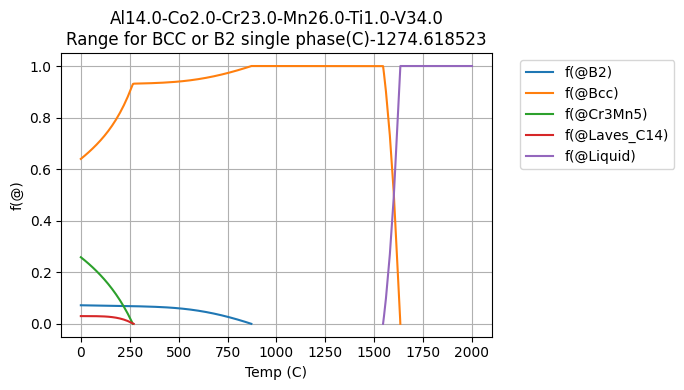

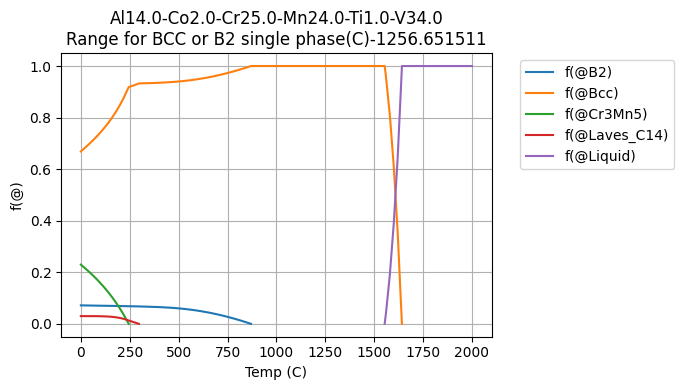

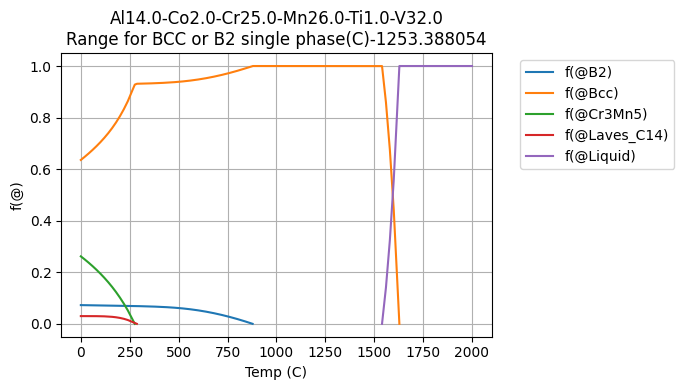

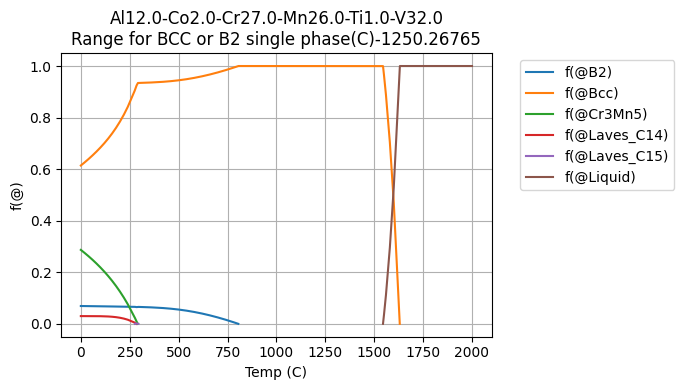

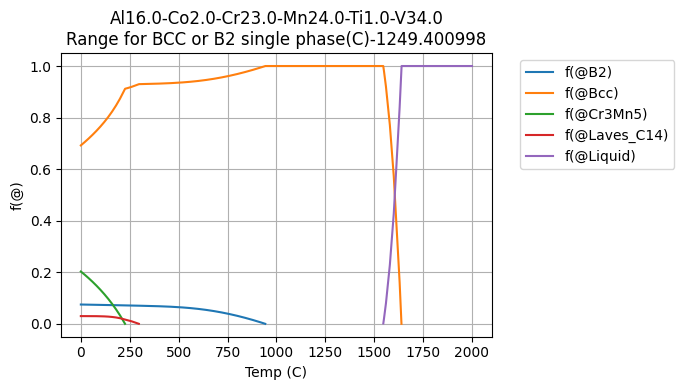

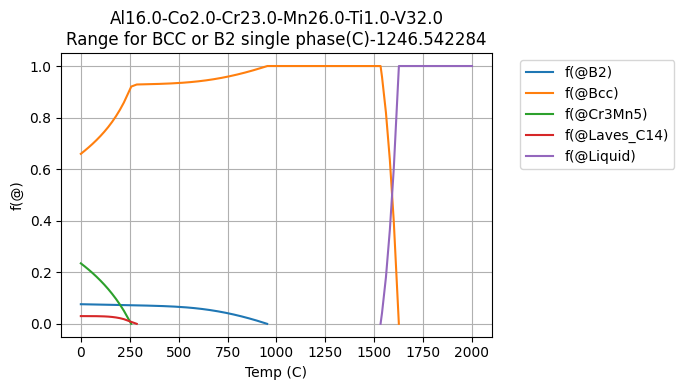

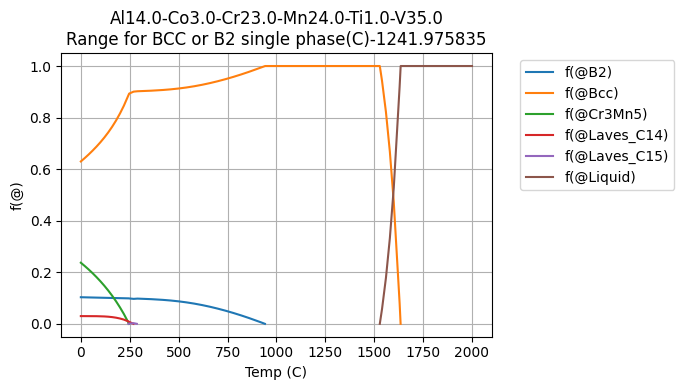

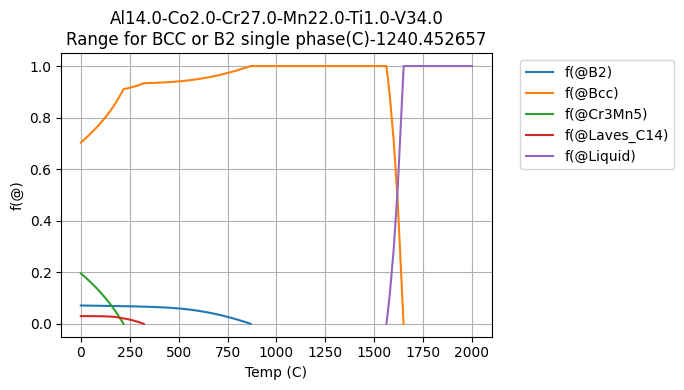

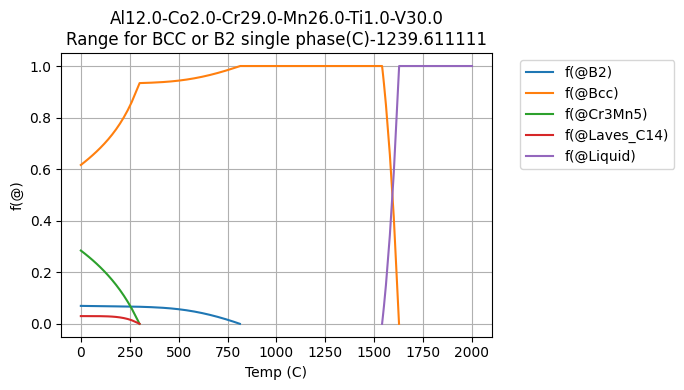

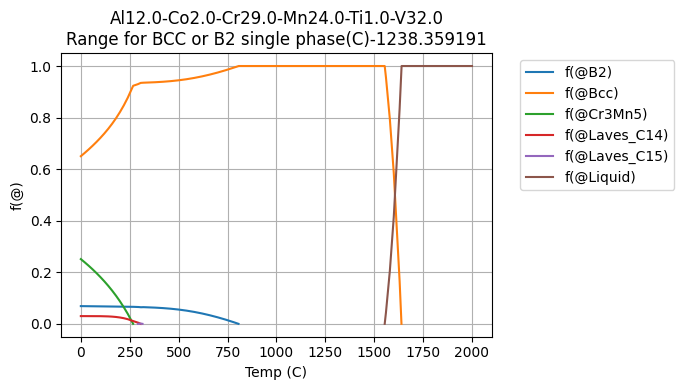

In [13]:
count = 0
for i, composition in enumerate(sorted_final_filtered_compositions.AlloyChemistry):
    count = count + 1
    if count <= 10:
        df_filtered = data.loc[data['AlloyChemistry'] == composition, data.columns[data.columns.str.startswith('f(@') | (data.columns == 'Temp')]]
        df_filtered = df_filtered.dropna(axis=1, how= 'all')
        df_filtered = df_filtered.astype(float)
        df_filtered = df_filtered.sort_values(by=['Temp'])
        phase_columns = [col for col in df_filtered.columns if col != 'Temp']

        fig, ax = plt.subplots(figsize = (7,4))
        for col in phase_columns:
            ax.plot(df_filtered['Temp'], df_filtered[col], '-', label = col)
        ax.legend(bbox_to_anchor=(1.05,1))
        ax.set_xlabel('Temp (C)')
        ax.set_ylabel('f(@)')
        ax.set_title(str(composition) + '\nRange for BCC or B2 single phase(C)-' + str(sorted_final_filtered_compositions.iloc[i].Range))
        ax.grid()
        plt.tight_layout()
        plt.savefig('plots/' + str(composition) + '.jpeg')
    

### For making phase diagram for any given composition

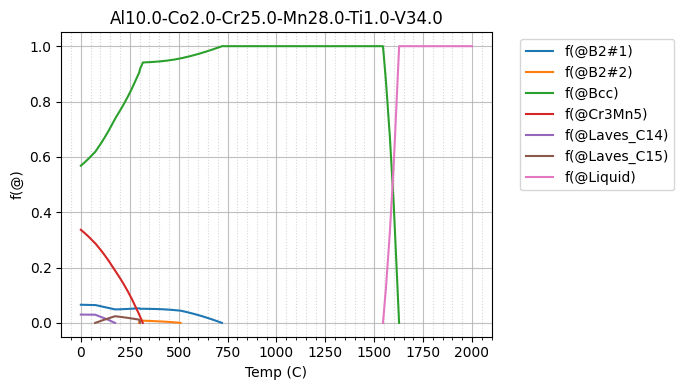

In [14]:
individual_composition = 'Al10.0-Co2.0-Cr25.0-Mn28.0-Ti1.0-V34.0'
import matplotlib.ticker as ticker
for composition in individual_composition:
    df_filtered = data.loc[data['AlloyChemistry'] == individual_composition, data.columns[data.columns.str.startswith('f(@') | (data.columns == 'Temp')]]
    df_filtered = df_filtered.dropna(axis=1, how= 'all')
    df_filtered = df_filtered.astype(float)
    df_filtered = df_filtered.sort_values(by=['Temp'])
    phase_columns = [col for col in df_filtered.columns if col != 'Temp']

fig, ax = plt.subplots(figsize = (7,4))
for col in phase_columns:
    ax.plot(df_filtered['Temp'], df_filtered[col], '-', label = col)
ax.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel('Temp (C)')
ax.set_ylabel('f(@)')
ax.set_title(str(individual_composition))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which = 'minor', alpha = 0.5, linestyle = 'dotted')
ax.grid(alpha = 0.8)
plt.tight_layout()
plt.savefig('plots/' + 'individual_plot-' + str(individual_composition) + '.jpeg')